In [182]:
#import the basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [183]:
import warnings
warnings.filterwarnings('ignore')
#import dataset
ds=pd.read_csv('corona_country.csv')

In [184]:
ds.head()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,2020-04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
3,2020-04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0
4,2020-04-18,UK,67844241,460437.0,114217.0,15464.0,NaN,1559.0,98409.0


checking the data

In [185]:
#checking the datatypes of tha columns
ds.dtypes

Date                    object
Country                 object
Population               int64
Total Tests            float64
Total Cases            float64
Total Deaths           float64
Total Recovered        float64
Serious or Critical    float64
Active Cases           float64
dtype: object

In [186]:
#check the unique values in columns
for i in ds.columns:
    print("\033[1m"+i+"\033[0m",ds[i].unique())
    print('----------')

Date ['2020-04-18' '2020-04-19' '2020-04-20' '2020-04-21' '2020-04-22'
 '2020-04-23' '2020-04-24' '2020-04-25' '2020-04-26' '2020-04-27'
 '2020-04-28' '2020-04-29' '2020-04-30' '2020-05-01' '2020-05-02'
 '2020-05-03' '2020-05-04' '2020-05-05' '2020-05-06' '2020-05-07'
 '2020-05-08' '2020-05-09' '2020-05-10' '2020-05-11' '2020-05-12'
 '2020-05-13' '2020-05-14' '2020-05-15' '2020-05-16' '2020-05-17'
 '2020-05-18']
----------
Country ['USA' 'Russia' 'Spain' 'Brazil' 'UK' 'Italy' 'France' 'Germany' 'Turkey'
 'Iran' 'India' 'Peru' 'China' 'Canada' 'Saudi Arabia' 'Belgium' 'Mexico'
 'Chile' 'Netherlands' 'Pakistan' 'Qatar' 'Ecuador' 'Switzerland'
 'Belarus' 'Sweden' 'Portugal' 'Singapore' 'Ireland' 'UAE' 'Bangladesh'
 'Poland' 'Ukraine' 'Indonesia' 'Romania' 'Israel' 'South Africa' 'Japan'
 'Colombia' 'Austria' 'Kuwait' 'Egypt' 'Dominican Republic' 'Philippines'
 'S. Korea' 'Denmark' 'Serbia' 'Panama' 'Czechia' 'Argentina' 'Norway'
 'Algeria' 'Bahrain' 'Afghanistan' 'Australia' 'Morocco' 'Ma

countey is the categorical variable and others are continuous
detahs is teh target

In [187]:
#check the number of rows and columns in the dataframe
ds.shape

(6603, 9)

In [188]:
#checking the null values in the dataset
print(ds.isna().sum())
print(ds.isnull().sum())

Date                      0
Country                   0
Population                0
Total Tests            1098
Total Cases              49
Total Deaths           1236
Total Recovered         285
Serious or Critical    2486
Active Cases             59
dtype: int64
Date                      0
Country                   0
Population                0
Total Tests            1098
Total Cases              49
Total Deaths           1236
Total Recovered         285
Serious or Critical    2486
Active Cases             59
dtype: int64


In [189]:
ds['Date']= pd.to_datetime(ds['Date'])
df_dates=pd.DataFrame()
df_dates['year']=ds['Date'].dt.year
df_dates['month']=ds['Date'].dt.month_name()
df_dates['day']=ds['Date'].dt.day_name()
df_dates['Total Tests']=ds['Total Tests']
df_dates['Total Cases']=ds['Total Cases']
df_dates['Total Deaths']=ds['Total Deaths']
df_dates['Total Recovered ']=ds['Total Recovered']
df_dates['Serious or Critical']=ds['Serious or Critical']
df_dates['Active Cases']=ds['Active Cases']
df_dates.head()

,year,month,day,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020,April,Saturday,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,2020,April,Saturday,1831892.0,36793.0,313.0,3057.0,8.0,33423.0
2,2020,April,Saturday,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
3,2020,April,Saturday,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0
4,2020,April,Saturday,460437.0,114217.0,15464.0,NaN,1559.0,98409.0


In [190]:
#check the unique columns in each column
for i in df_dates.columns:
    print("\033[1m"+i+"\033[0m",df_dates[i].unique())
    print('----------')

year [2020]
----------
month ['April' 'May']
----------
day ['Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday']
----------
Total Tests [3.722145e+06 1.831892e+06 9.302300e+05 ... 1.396200e+04 4.565000e+03
 4.330000e+02]
----------
Total Cases [7.38792e+05 3.67930e+04 1.94416e+05 ... 3.52000e+02 2.48000e+02
 1.88000e+02]
----------
Total Deaths [39014.   313. 20043. ...  1120.   749.   382.]
----------
Total Recovered  [68269.  3057. 74797. ...   652.   432.   475.]
----------
Serious or Critical [1.3551e+04 8.0000e+00 7.3710e+03 6.6340e+03 1.5590e+03 2.7330e+03
 5.8330e+03 2.9220e+03 1.8940e+03 3.5130e+03        nan 1.1700e+02
 8.5000e+01 5.5700e+02 7.8000e+01 1.1190e+03 2.0700e+02 3.6000e+02
 1.2790e+03 4.6000e+01 3.7000e+01 1.6800e+02 3.8600e+02 6.5000e+01
 1.0540e+03 2.2800e+02 2.3000e+01 2.9400e+02 1.0000e+00 1.6000e+02
 4.5000e+01 2.4800e+02 1.6400e+02 3.6000e+01 2.2100e+02 9.8000e+01
 2.0800e+02 3.4000e+01 1.4600e+02 5.5000e+01 7.6000e+01 1.2600e+02
 9.6000e+

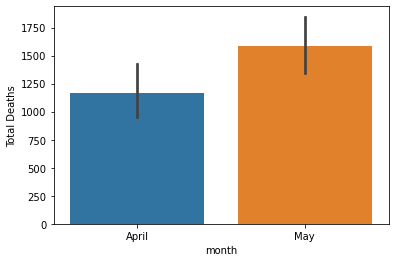

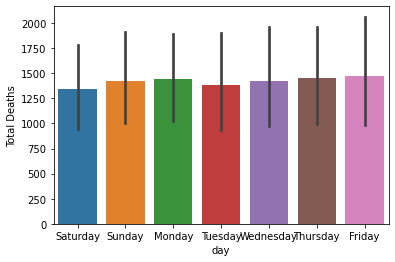

In [191]:
#check relation of month and day with teh deaths
sns.barplot(x='month',y='Total Deaths',data=df_dates)
plt.show()
sns.barplot(x='day',y='Total Deaths',data=df_dates)
plt.show()

deaths is almost independent of the days of teh week.


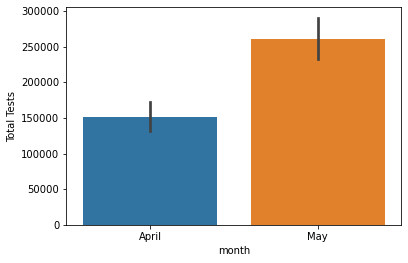

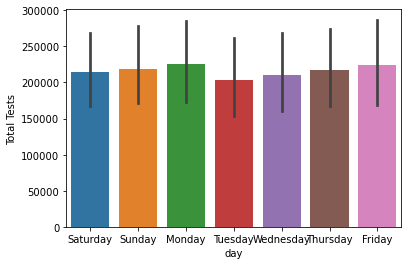

In [192]:
#check relation of month and day with total tests
sns.barplot(x='month',y='Total Tests',data=df_dates)
plt.show()
sns.barplot(x='day',y='Total Tests',data=df_dates)
plt.show()

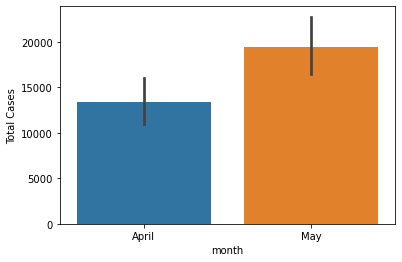

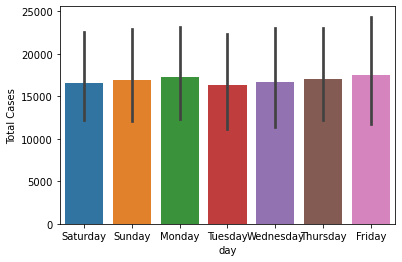

In [193]:
#check relation of month and day with total cases
sns.barplot(x='month',y='Total Cases',data=df_dates)
plt.show()
sns.barplot(x='day',y='Total Cases',data=df_dates)
plt.show()

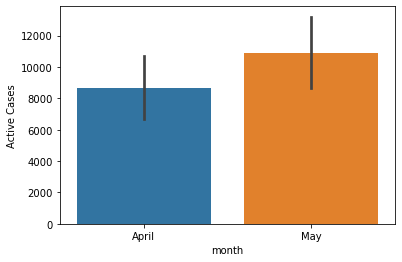

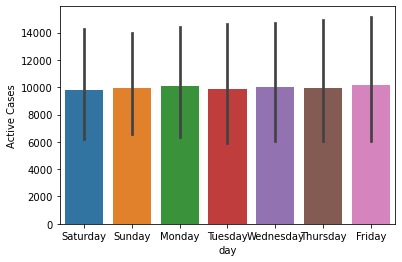

In [194]:
sns.barplot(x='month',y='Active Cases',data=df_dates)
plt.show()
sns.barplot(x='day',y='Active Cases',data=df_dates)
plt.show()

In [195]:
#dropping dates columns and adding just the months columns in the original dataset
ds.drop('Date',axis=1,inplace=True)
ds['Month']=df_dates['month']

In [196]:
#encoding month variable
mapping_dict={'Month':{'April':0,'May':1}}
ds.replace(mapping_dict,inplace=True)

In [197]:
ds=ds[['Country','Month','Population','Total Tests','Serious or Critical','Total Cases','Active Cases','Total Recovered','Total Deaths']]

In [198]:
ds.describe()

,Month,Population,Total Tests,Serious or Critical,Total Cases,Active Cases,Total Recovered,Total Deaths
count,6603.000000,6.603000e+03,5.505000e+03,4117.000000,6.554000e+03,6.544000e+03,6318.000000,5367.000000
mean,0.580645,3.637913e+07,2.167252e+05,386.748360,1.692968e+04,9.964142e+03,5855.424185,1416.252096
std,0.493491,1.411537e+08,7.595143e+05,1658.428324,8.861467e+04,6.541025e+04,23467.641235,6645.247810
min,0.000000,8.010000e+02,1.000000e+01,1.000000,1.000000e+00,0.000000e+00,1.000000,0.000000
25%,0.000000,8.672680e+05,2.690000e+03,3.000000,7.900000e+01,2.600000e+01,26.000000,6.000000
50%,1.000000,6.859926e+06,2.547800e+04,13.000000,6.135000e+02,2.720000e+02,219.000000,24.000000
75%,1.000000,2.546422e+07,1.437810e+05,89.000000,4.877500e+03,2.041000e+03,1394.750000,199.000000
max,1.000000,1.439324e+09,1.230074e+07,18671.000000,1.550294e+06,1.101930e+06,356383.000000,91981.000000


1. outliers are present in all teh columns as there is large difference between 75% and max in all columns
2. maximum deatsh are 91981 while total recovered are 356383
3. similar is the case for serious or critical

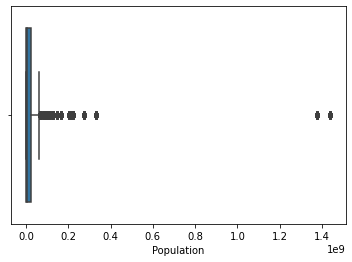

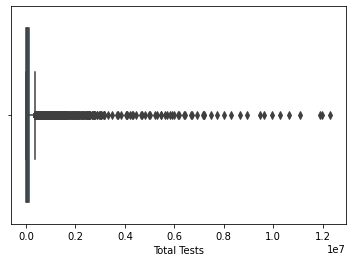

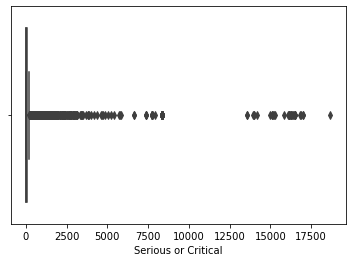

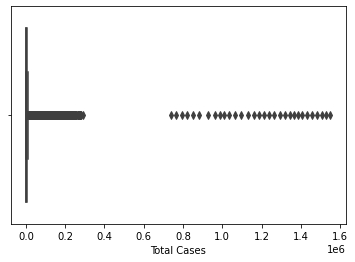

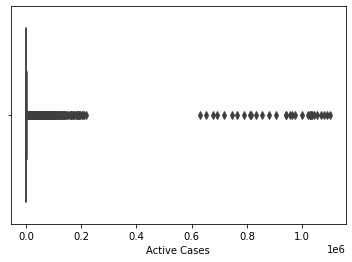

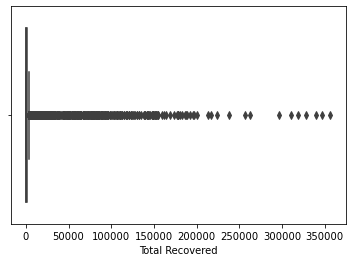

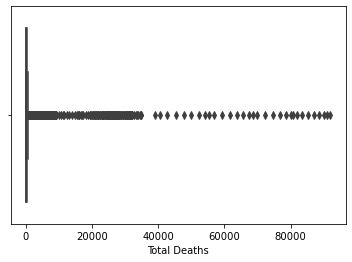

In [199]:
num_col=['Population','Total Tests','Serious or Critical','Total Cases','Active Cases','Total Recovered','Total Deaths']
for i in num_col:
    sns.boxplot(ds[i])
    plt.show()

In [200]:
#encoding teh country column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()  
ds['Country']=le.fit_transform(ds['Country'])
ds.head()

,Country,Month,Population,Total Tests,Serious or Critical,Total Cases,Active Cases,Total Recovered,Total Deaths
0,201,0,330774664,3722145.0,13551.0,738792.0,631509.0,68269.0,39014.0
1,158,0,145927292,1831892.0,8.0,36793.0,33423.0,3057.0,313.0
2,180,0,46752703,930230.0,7371.0,194416.0,99576.0,74797.0,20043.0
3,26,0,212380932,62985.0,6634.0,36722.0,20335.0,14026.0,2361.0
4,200,0,67844241,460437.0,1559.0,114217.0,98409.0,NaN,15464.0


In [201]:
ds['Country'].unique()

array([201, 158, 180,  26, 200,  98,  69,  75, 197,  93,  91, 152,  42,
        36, 168,  18, 127,  41, 138, 147, 156,  57, 187,  17, 186, 155,
       173,  95, 199,  15, 154, 203,  92, 157,  97, 178, 101,  43,  11,
       105,  58,  56, 153, 161,  53, 170, 149,  51,   7, 145,   2,  14,
         0,  10, 133, 119, 103,  68, 143, 128,  76, 146,   8,  23, 115,
        94,  89,  35,  12, 192,  78,  83, 205,  87, 184, 169,  24,  29,
        47,  99,  82,  48, 144,  90,  62, 190, 114,  52,  54, 140, 175,
       176, 177,  72,  59, 126, 106, 120,  88, 196,  84, 108, 181,   1,
       109,  50, 104, 142, 121,  46,  30, 151,   3, 211, 204,  60,  74,
       166, 102, 207, 122,  40,  86, 100,  39, 172, 191, 160, 189,  45,
       148, 137,  64,  20,  96, 125, 194,  33,  32, 131, 208, 117, 159,
       179, 202, 167, 111,  70,  63, 123, 135,  65,  81,  77, 134,  28,
       130, 210,  21,  85,  34, 195,   9, 129,  13,  38,  16, 113, 124,
       174, 118, 112,  71, 188,   4, 212, 116,  31, 164,  61, 14

In [202]:
ds1=ds

In [203]:
ds1

,Country,Month,Population,Total Tests,Serious or Critical,Total Cases,Active Cases,Total Recovered,Total Deaths
0,201,0,330774664,3722145.0,13551.0,738792.0,631509.0,68269.0,39014.0
1,158,0,145927292,1831892.0,8.0,36793.0,33423.0,3057.0,313.0
2,180,0,46752703,930230.0,7371.0,194416.0,99576.0,74797.0,20043.0
3,26,0,212380932,62985.0,6634.0,36722.0,20335.0,14026.0,2361.0
4,200,0,67844241,460437.0,1559.0,114217.0,98409.0,NaN,15464.0
...,...,...,...,...,...,...,...,...,...
6598,182,1,9874,NaN,NaN,6.0,0.0,6.0,NaN
6599,209,1,595462,NaN,NaN,6.0,0.0,6.0,NaN
6600,5,1,14987,NaN,NaN,3.0,0.0,3.0,NaN
6601,110,1,2140235,NaN,NaN,1.0,1.0,NaN,NaN


In [204]:
#imputing with mean wherever possible
ds1['Total Cases'].fillna(ds1['Total Cases'].mean(),inplace=True)
ds1['Active Cases'].fillna(ds1['Active Cases'].mean(),inplace=True)
ds1['Total Recovered'].fillna(ds1['Total Recovered'].mean(),inplace=True)

In [205]:
print(ds1.isna().sum())
print(ds1.isnull().sum())

Country                   0
Month                     0
Population                0
Total Tests            1098
Serious or Critical    2486
Total Cases               0
Active Cases              0
Total Recovered           0
Total Deaths           1236
dtype: int64
Country                   0
Month                     0
Population                0
Total Tests            1098
Serious or Critical    2486
Total Cases               0
Active Cases              0
Total Recovered           0
Total Deaths           1236
dtype: int64


In [206]:
#preparing ds for imputing by prediction
train=ds1.iloc[:,:-1]
train.head()

,Country,Month,Population,Total Tests,Serious or Critical,Total Cases,Active Cases,Total Recovered
0,201,0,330774664,3722145.0,13551.0,738792.0,631509.0,68269.000000
1,158,0,145927292,1831892.0,8.0,36793.0,33423.0,3057.000000
2,180,0,46752703,930230.0,7371.0,194416.0,99576.0,74797.000000
3,26,0,212380932,62985.0,6634.0,36722.0,20335.0,14026.000000
4,200,0,67844241,460437.0,1559.0,114217.0,98409.0,5855.424185


In [207]:
#predicting missing values
import sys
from impyute.imputation.cs import fast_knn
sys.setrecursionlimit(10000)
imputed_training=fast_knn(train.values)

In [208]:
imputed_training

array([[2.01000000e+02, 0.00000000e+00, 3.30774664e+08, ...,
        7.38792000e+05, 6.31509000e+05, 6.82690000e+04],
       [1.58000000e+02, 0.00000000e+00, 1.45927292e+08, ...,
        3.67930000e+04, 3.34230000e+04, 3.05700000e+03],
       [1.80000000e+02, 0.00000000e+00, 4.67527030e+07, ...,
        1.94416000e+05, 9.95760000e+04, 7.47970000e+04],
       ...,
       [5.00000000e+00, 1.00000000e+00, 1.49870000e+04, ...,
        3.00000000e+00, 0.00000000e+00, 3.00000000e+00],
       [1.10000000e+02, 1.00000000e+00, 2.14023500e+06, ...,
        1.00000000e+00, 1.00000000e+00, 5.85542418e+03],
       [1.65000000e+02, 1.00000000e+00, 5.79700000e+03, ...,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [209]:
ds1=pd.DataFrame(imputed_training,columns=train.columns)

In [210]:
ds1.head()

,Country,Month,Population,Total Tests,Serious or Critical,Total Cases,Active Cases,Total Recovered
0,201.0,0.0,330774664.0,3722145.0,13551.0,738792.0,631509.0,68269.000000
1,158.0,0.0,145927292.0,1831892.0,8.0,36793.0,33423.0,3057.000000
2,180.0,0.0,46752703.0,930230.0,7371.0,194416.0,99576.0,74797.000000
3,26.0,0.0,212380932.0,62985.0,6634.0,36722.0,20335.0,14026.000000
4,200.0,0.0,67844241.0,460437.0,1559.0,114217.0,98409.0,5855.424185


In [211]:
ds1['Total Deaths']=ds['Total Deaths']

In [212]:
print(ds1.isna().sum())

Country                   0
Month                     0
Population                0
Total Tests             142
Serious or Critical     402
Total Cases               0
Active Cases              0
Total Recovered           0
Total Deaths           1236
dtype: int64


In [213]:
ds1.dropna(inplace=True)

In [214]:
#all teh null values removed from the dataset
ds1.isnull().sum()

Country                0
Month                  0
Population             0
Total Tests            0
Serious or Critical    0
Total Cases            0
Active Cases           0
Total Recovered        0
Total Deaths           0
dtype: int64

In [215]:
ds1.shape

(5169, 9)

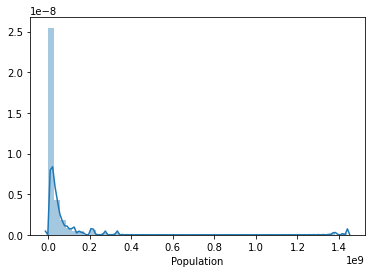

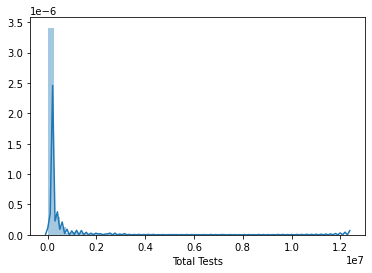

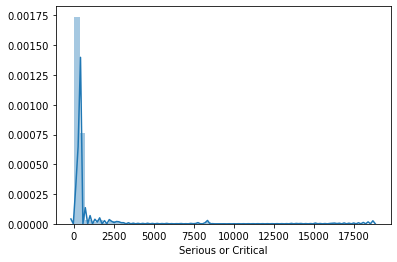

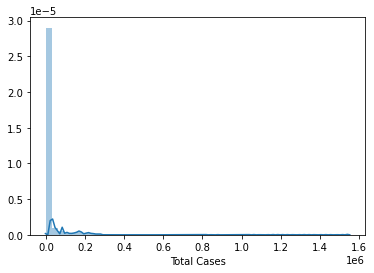

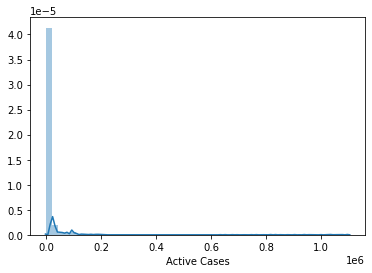

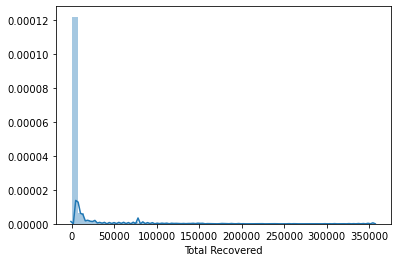

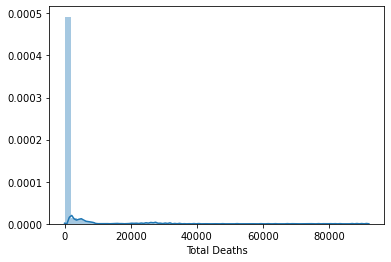

In [216]:
#Vizualizing data
#data is skewed as all teh parameters are high in densely populated countried and USA
for i in num_col:
    sns.distplot(ds1[i])
    plt.show()

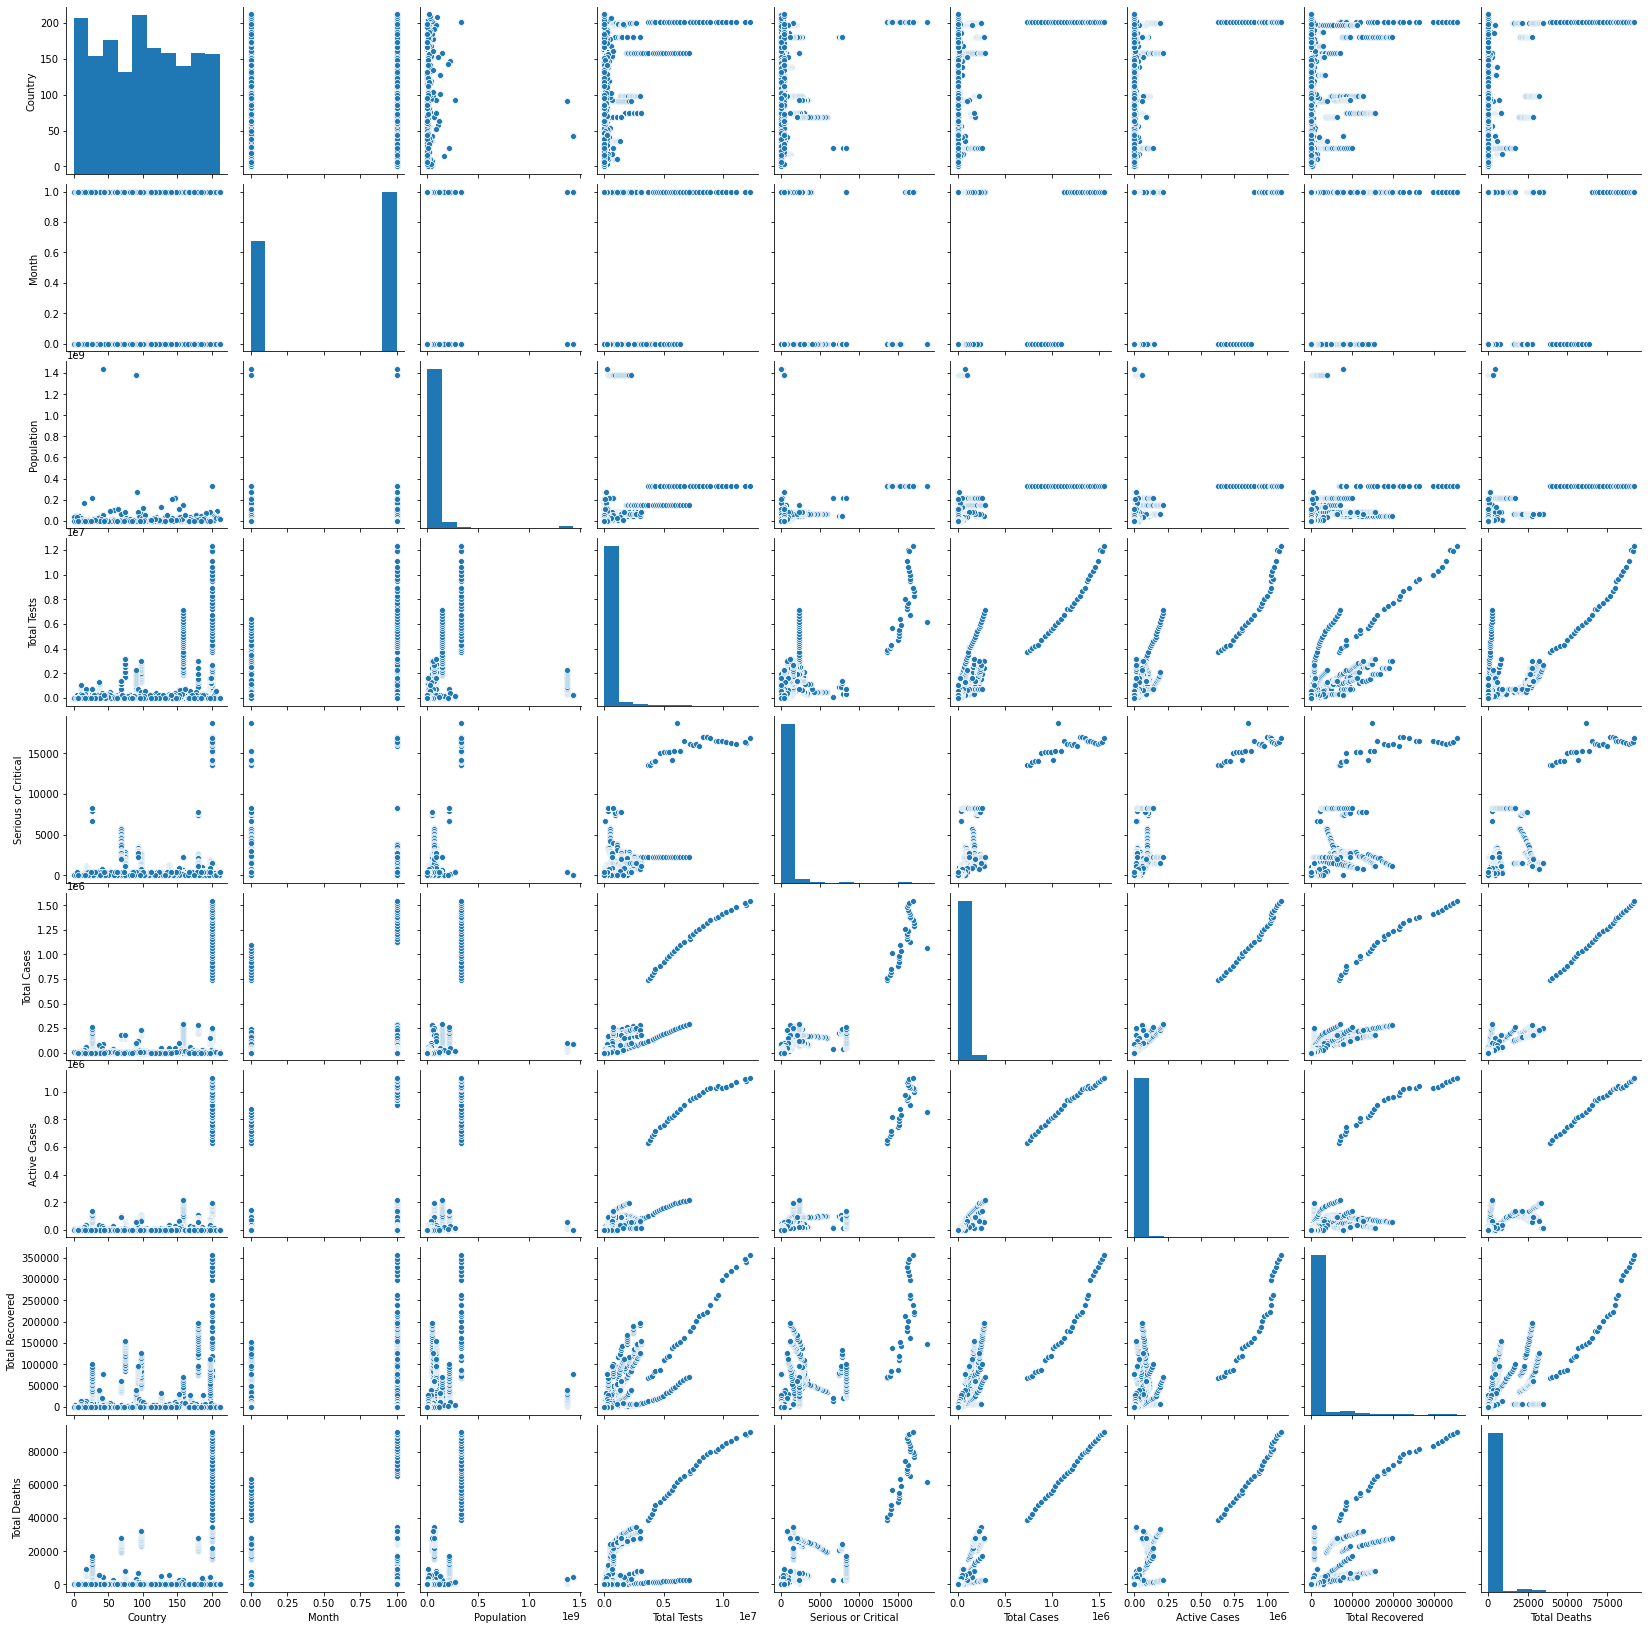

In [217]:
#check relation ship of variables with each other
sns.pairplot(ds1)

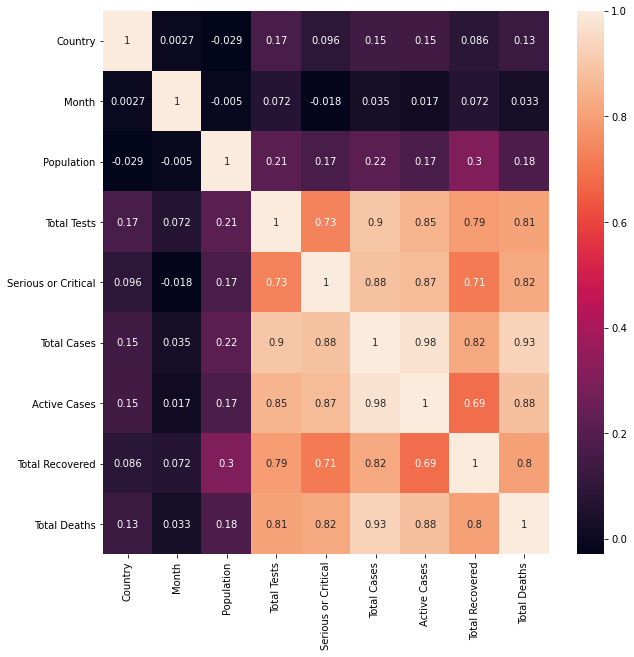

In [218]:
#check correlation
plt.figure(figsize=(10,10))
sns.heatmap(ds1.corr(),color='k',annot=True)

1. target is least correalted with month
2. here is high correlation between all the numerical columns
3. surprisingly population does not affect deaths much in teh given dataset

In [219]:
ds1.isnull().sum()

Country                0
Month                  0
Population             0
Total Tests            0
Serious or Critical    0
Total Cases            0
Active Cases           0
Total Recovered        0
Total Deaths           0
dtype: int64

In [220]:
#divide between independent and dependent variable
x=ds1.iloc[:,0:-1]
y=ds1.iloc[:,-1]

In [221]:
x.head()

,Country,Month,Population,Total Tests,Serious or Critical,Total Cases,Active Cases,Total Recovered
0,201.0,0.0,330774664.0,3722145.0,13551.0,738792.0,631509.0,68269.000000
1,158.0,0.0,145927292.0,1831892.0,8.0,36793.0,33423.0,3057.000000
2,180.0,0.0,46752703.0,930230.0,7371.0,194416.0,99576.0,74797.000000
3,26.0,0.0,212380932.0,62985.0,6634.0,36722.0,20335.0,14026.000000
4,200.0,0.0,67844241.0,460437.0,1559.0,114217.0,98409.0,5855.424185


In [222]:
y.head()

0    39014.0
1      313.0
2    20043.0
3     2361.0
4    15464.0
Name: Total Deaths, dtype: float64

In [223]:
ds_test=y

In [224]:
#import metrics and models
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.20)

In [225]:
ds_test.isnull().sum()

0

making primary prediction

In [226]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
r2_score(y_test,pred_lr)

0.9130678188621567

In [227]:
x1=x
y1=y

tuning the random state

In [228]:
r2_scr = 0
random_state=0
for i in range (42,100):
    x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size = .20,random_state=i)
    lr.fit(x1_train,y1_train)
    pred_lr = lr.predict(x1_test)
    x=r2_score(y1_test,pred_lr)
    if x>r2_scr:
        r2_scr = x
        random_state=i


In [229]:
print(r2_scr,random_state)

0.9533073135448267 57


lets see if we get better results using rfr one of teh ensembling technique

In [230]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
r2_scr_rfr = 0
random_state_rfr=0
for i in range (42,100):
    x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size = .20,random_state=i)
    rfr.fit(x1_train,y1_train)
    pred_rfr = rfr.predict(x1_test)
    x=r2_score(y1_test,pred_rfr)
    if x>r2_scr_rfr:
        r2_scr_rfr = x
        random_state_rfr=i
print(r2_scr_rfr,random_state_rfr)
print(r2_score(y1_test,pred_rfr))

0.999685325106268 51
0.9996314580647631


In [231]:
#doing cross validation to see if model is performing well and not under/over fitting
from sklearn.model_selection import cross_val_score
cross_val_score(rfr,x1,y1,cv=5,scoring='r2').mean()

0.9772825850612131

In [232]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size = .20,random_state=88)

In [233]:
print(x1_train.shape)
print(y1_train.shape)
print(x1_test.shape)
print(y1_test.shape)

(4135, 8)
(4135,)
(1034, 8)
(1034,)


In [234]:
rfr.fit(x1_train,y1_train)
rfr_pred = rfr.predict(x1_test)
r2_score(y1_test,rfr_pred)

0.9997218816032065

In [235]:
pd.DataFrame(rfr_pred).to_csv('covid_rfr.csv')

In [236]:
pd.DataFrame(y1_test).to_csv('actual.csv')

In [237]:
#finalize and save the model
import joblib
joblib.dump(rfr,'covid.pkl')

['covid.pkl']

In [238]:
#importing age distribution in each country
ds_age=pd.read_csv('age_dist.csv')

In [239]:
ds_age.head()

,Country,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,USA,0.189,0.657,0.154
1,Russia,0.176,0.682,0.142
2,Spain,0.147,0.659,0.194
3,Brazil,0.217,0.697,0.086
4,UK,0.177,0.638,0.185


In [240]:
ds_age['Country']=le.fit_transform(ds_age['Country'])
ds_age.head()

,Country,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,201,0.189,0.657,0.154
1,158,0.176,0.682,0.142
2,180,0.147,0.659,0.194
3,26,0.217,0.697,0.086
4,200,0.177,0.638,0.185


In [241]:
ds_age['Country'].value_counts()

212    1
78     1
76     1
75     1
74     1
      ..
138    1
137    1
136    1
135    1
0      1
Name: Country, Length: 213, dtype: int64

In [242]:
ds_age.shape

(213, 4)

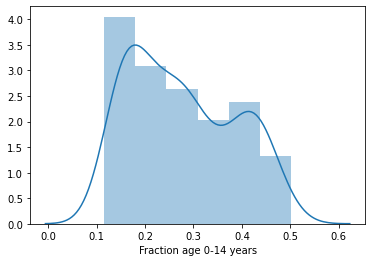

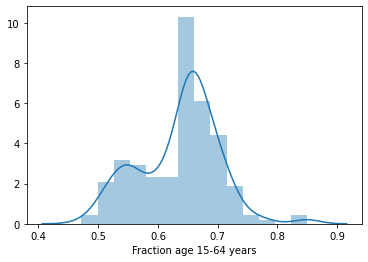

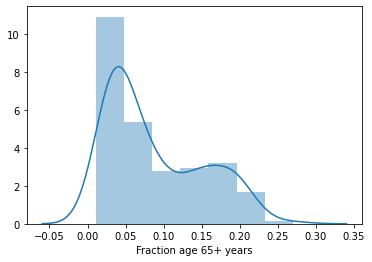

In [243]:
for i in ('Fraction age 0-14 years','Fraction age 15-64 years','Fraction age 65+ years'):
    sns.distplot(ds_age[i])
    plt.show()

maximun population lies in the age goup of 0-14 years 
also a pretty number of population lies in the old age group